In [1]:
import numpy as np
import matplotlib.pyplot as plt
samples = []
n = 4
k = 3
N = 100000

np.random.seed(42)

A_T = np.array([[1,1,0,1],[1,0,1,1],[0,1,1,1]])
H = np.hstack((A_T,np.identity(k)))

for i in range(N):
    samples.append(np.random.binomial(1,0.5,n))

samples = np.array(samples)
samples = samples.reshape(N,n)
parity = np.zeros((N,k))
parity[:,0] = samples[:,0]+samples[:,1]+samples[:,3]
parity[:,1] = samples[:,0]+samples[:,2]+samples[:,3]
parity[:,2] = samples[:,1]+samples[:,2]+samples[:,3]


parity = parity%2
Code = np.hstack((samples, parity))
Bin_Code = (2*Code)-1

lookup = np.array([[0,0,1],
[0,1,0],
[1,0,0],
[1,1,1],
[0,1,1],
[1,0,1],
[1,1,0]])

lookup_error = np.array([[0,0,0,0,0,0,1],
[0,0,0,0,0,1,0],
[0,0,0,0,1,0,0],
[0,0,0,1,0,0,0],
[0,0,1,0,0,0,0],
[0,1,0,0,0,0,0],
[1,0,0,0,0,0,0]])

###### Graph Calculation
SNR_arr = np.arange(0,7,0.1)
Var_arr = (10**(-SNR_arr/10.0))**(7/9)
pr1 = []
for i in range(len(Var_arr)):
     noise = np.random.normal(0,Var_arr[i],Code.shape)
     Noised_code = Bin_Code+noise
     Noised_code = (Noised_code+1)/2
     Noised_code = np.where(Noised_code > 0.5, 1.0, 0.0)

     Syndrome = np.matmul(Noised_code,H.T)
     Syndrome = Syndrome%2

     for j in range(N):
         for k in range(len(lookup)):
             if(np.array_equal(Syndrome[j],lookup[k])):
                 Noised_code[j] += lookup_error[k]

     Noised_code = Noised_code%2
     Err = (Code+Noised_code)%2
     #print(Err)
     Err1 = np.sum(Err, axis = 1)
     #print(Err1)
     Err2 = np.count_nonzero(Err1)
     pr1.append(Err2/N)

# print(pr1)
# print(SNR_arr)


plt.plot(SNR_arr, 0.5*np.log10(pr1))
plt.show()

SNR_arr_743 = SNR_arr
pr1_743 = 0.5*np.log10(pr1)

/home/legion/.local/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log10


<Figure size 640x480 with 1 Axes>

/home/legion/.local/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log10


In [4]:
np.save('SNR_743',SNR_arr_743)
np.save('pr_743',pr1_743)

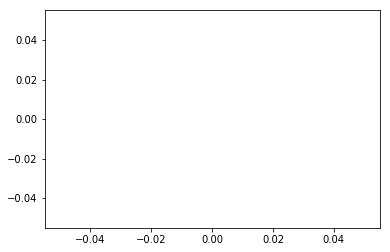

In [7]:
plt.plot(SNR_arr_743,pr1_743)